In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import


In [34]:
def initialize_model():

    #############################
    #  1 - Model architecture   #
    #############################

    # $CHALLENGIFY_BEGIN
    model = models.Sequential()
    model.add(layers.Dense(5, input_dim=5, activation='relu'))
    model.add(layers.Dense(1, activation='softmax'))
    # $CHALLENGIFY_END

    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced

    return model

model = initialize_model()


In [35]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36 (144.00 Byte)
Trainable params: 36 (144.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
f1 = np.linspace(0,1,50)
f2 = np.linspace(1,2,50)
f3 = np.linspace(0,2,50)
f4 = np.linspace(1,2,50)
f5 = np.linspace(0,0.5,50)


In [37]:
# 5 features

X = pd.DataFrame({
    "f1": f1,
    "f2": f2,
    "f3": f3,
    "f4": f4,
    "f5": f5
})


In [38]:
y = np.linspace(0,10,50)
y.shape, X.shape


((50,), (50, 5))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [40]:
X_train.shape, y_train.shape


((40, 5), (40,))

In [41]:
history = model.fit(X_train,
                    y_train,
                    epochs = 10,
                    batch_size = 8,
                    verbose = 0) # Try different verbose


/home/kristjan/.pyenv/versions/3.10.6/envs/ML_vs_Cancer/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(8, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


In [42]:
history.__dict__


{'validation_data': None,
 'model': <keras.src.engine.sequential.Sequential at 0x7f7cc4eba290>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]},
 'params': {'verbose': 0, 'epochs': 10, 'steps': 5},
 'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [43]:
history.history


{'loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

In [47]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


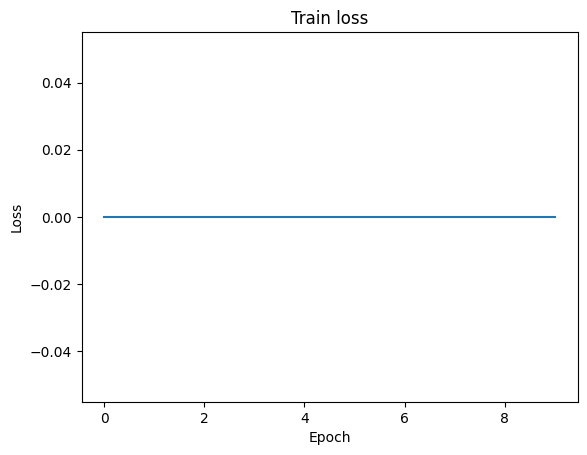

In [48]:
plot_history(history)


In [49]:
res = model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


/home/kristjan/.pyenv/versions/3.10.6/envs/ML_vs_Cancer/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


In [61]:
test = pd.DataFrame(X_test.iloc[0]).T


In [62]:
test


,f1,f2,f3,f4,f5
44,0.897959,1.897959,1.795918,1.897959,0.44898


In [63]:
y_pred = model.predict(test)


1/1 [==============================] - 0s 19ms/step


In [64]:
y_pred


array([[1.]], dtype=float32)

In [65]:
model.save("dummy_model.h5")


/home/kristjan/.pyenv/versions/3.10.6/envs/ML_vs_Cancer/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
from tensorflow import keras
loaded_model = keras.models.load_model("dummy_model.h5")


In [73]:
loaded_model.predict(test)


1/1 [==============================] - 0s 45ms/step


array([[1.]], dtype=float32)

## Convert image to array


In [ ]:
from PIL import Image
import numpy as np
import cv2
path = "/home/kristjan/code/ML_vs_Cancer/raw_data/train_subset/a_no_tumor_tissue/0a2ede7cd442222b402ee53050a21b109563b5b5.tif"
image = 
def read_and_process_image(image):
    img = Image.open(file_path)
    img = img.resize((224, 224))
    return img

images = [os.path.join(image_folder_label0, img) if label == 0 else os.path.join(image_folder_label1, img) for img, label in zip(images, labels)]

# image_arrays = [read_and_process_image(img) for img in images]
image_arrays = [cv2.imread(img_path) for img_path in images]

valid_data = [(img, label, img_array) for img, label, img_array in zip(images, labels, image_arrays) if img_array is not None]
df = pd.DataFrame(valid_data, columns=['image_path', 'label', 'image_array'])

In [2]:
!pip install tifffile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.9/222.9 kB 3.4 MB/s eta 0:00:00a 0:00:01


In [9]:
import tifffile
import numpy as np


In [22]:
file_path = "/home/kristjan/code/ML_vs_Cancer/notebooks/1.tif"
def read_tiff_image(file_path):
    try:
        # Read the TIFF image using tifffile
        tiff_data = tifffile.imread(file_path)

        # Convert to NumPy array if not already
        if not isinstance(tiff_data, np.ndarray):
            tiff_data = np.array(tiff_data)

        return tiff_data
    except Exception as e:
        print(f"Error reading TIFF image: {e}")
        return None

# Example usage:
tif_file_path = file_path
image_array = read_tiff_image(file_path)

if image_array is not None:
    print("Image shape:", image_array.shape)
    print(image_array)
    # Add your further processing logic here

Image shape: (96, 96, 3)
[[[214 198 224]
  [110  94 105]
  [188 169 171]
  ...
  [ 50  18  55]
  [ 61  33  73]
  [ 59  33  78]]

 [[255 246 255]
  [219 203 216]
  [255 244 247]
  ...
  [ 58  21  55]
  [ 28   0  31]
  [155 124 165]]

 [[150 128 164]
  [247 228 248]
  [225 208 216]
  ...
  [121  77 110]
  [185 141 177]
  [255 218 255]]

 ...

 [[195 166 188]
  [241 208 229]
  [193 151 173]
  ...
  [ 47   4  57]
  [129  87 135]
  [133  94 139]]

 [[255 246 255]
  [158 125 142]
  [225 181 204]
  ...
  [ 33   1  48]
  [ 52  22  60]
  [ 97  66 100]]

 [[115  92 100]
  [235 203 218]
  [211 167 192]
  ...
  [ 41  20  61]
  [ 55  31  63]
  [ 42  18  42]]]


In [23]:
def read_tiff_image(file):
    try:
        # Read the TIFF image using tifffile
        tiff_data = tifffile.imread(file)

        # Convert to NumPy array if not already
        if not isinstance(tiff_data, np.ndarray):
            tiff_data = np.array(tiff_data)

        return tiff_data
    except Exception as e:
        print(f"Error reading TIFF image: {e}")
        return None

In [25]:
# Open the TIFF file in binary mode and pass the file object to the function
with open(file_path, 'rb') as tiff_file:
    image_array = read_tiff_image(tiff_file)

if image_array is not None:
    print("Image shape:", image_array.shape)
    print(image_array)
    # Add your further processing logic here

Image shape: (96, 96, 3)
[[[214 198 224]
  [110  94 105]
  [188 169 171]
  ...
  [ 50  18  55]
  [ 61  33  73]
  [ 59  33  78]]

 [[255 246 255]
  [219 203 216]
  [255 244 247]
  ...
  [ 58  21  55]
  [ 28   0  31]
  [155 124 165]]

 [[150 128 164]
  [247 228 248]
  [225 208 216]
  ...
  [121  77 110]
  [185 141 177]
  [255 218 255]]

 ...

 [[195 166 188]
  [241 208 229]
  [193 151 173]
  ...
  [ 47   4  57]
  [129  87 135]
  [133  94 139]]

 [[255 246 255]
  [158 125 142]
  [225 181 204]
  ...
  [ 33   1  48]
  [ 52  22  60]
  [ 97  66 100]]

 [[115  92 100]
  [235 203 218]
  [211 167 192]
  ...
  [ 41  20  61]
  [ 55  31  63]
  [ 42  18  42]]]
